# Using SVM to Predict Who is a Credit Risk

# Necessary Imports

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

# Import Data, Merge into a New Dataset

In [2]:
# payment_data.csv contains data of about a customer's payment history
# customer_data.csv contains demographic data of each customer
# These datasets were merged in the following function.

payment_data = pd.read_csv("payment_data.csv")
customer_data = pd.read_csv("customer_data.csv")
df = pd.merge(customer_data,payment_data)

# Preprocess

In [3]:
from sklearn.preprocessing import StandardScaler

# Preprocessing the data before SVM. Data is scaled using StandardScaler for better results.

def preprocess(df):
    df.drop_duplicates()
    df.dropna(inplace=True)

    df['fea_2'].fillna(df['fea_2'].median(), inplace=True)
    df['highest_balance'].fillna(df['highest_balance'].median(), inplace=True)

    # Scale numerical features
    scaler = StandardScaler()

    num_cols = ['fea_1', 'fea_2', 'fea_3', 'fea_4', 'fea_5', 'fea_6', 'fea_7', 'fea_8', 'fea_9', 'fea_10', 'fea_11', 'OVD_t1', 'OVD_t2', 'OVD_t3', 'OVD_sum', 'pay_normal', 'new_balance', 'highest_balance']
    df[num_cols] = scaler.fit_transform(df[num_cols])
    df = df[['label', 'fea_1', 'fea_2', 'fea_3', 'fea_4', 'fea_5', 'fea_6', 'fea_7', 'fea_8', 'fea_9', 'fea_10', 'fea_11', 'OVD_t1', 'OVD_t2', 'OVD_t3', 'OVD_sum', 'pay_normal', 'new_balance', 'highest_balance']]
    
    return df

In [4]:
df = preprocess(df)

In [5]:
X = df.drop(['label'], axis=1)
y = df['label']

#  Divide into training and test data

In [6]:
# feature_df (1697) -> Train (no. rows) / Test (no. rows) ## 80/20 split
# Train(X, y) ## X is a 2D array and y is a 1D array
# Test(X, y)

from sklearn.model_selection import train_test_split

def split(X, y, test_size = 0.2):
    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = test_size, random_state = 42)
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size = test_size, random_state = 42)
    
    print("X_train", X_train.shape, "y_train", y_train.shape)
    print("X_val",X_val.shape, "y_val", y_val.shape)
    print("X_train_val",X_train_val.shape, "y_train_val", y_train_val.shape)
    print("X_test",X_test.shape, "y_test",y_test.shape)
    
    return X_train, y_train, X_val, y_val, X_train_val, y_train_val, X_test, y_test

In [7]:
def visualize_split(sets, labels):
    sizes = [len(s) for s in sets]
    colors = [tuple(np.random.rand(3)) for _ in range(len(sets))]
    plt.pie(sizes, labels = labels, colors = colors, autopct ='%2.2f%%', startangle = 90)
    plt.title('Data Split')
    plt.axis('equal')
    plt.show()

X_train (1085, 18) y_train (1085,)
X_val (272, 18) y_val (272,)
X_train_val (1357, 18) y_train_val (1357,)
X_test (340, 18) y_test (340,)


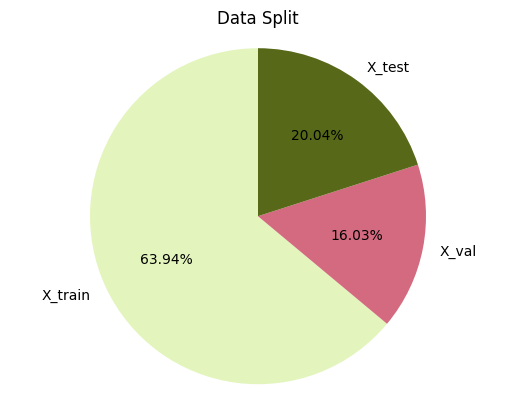

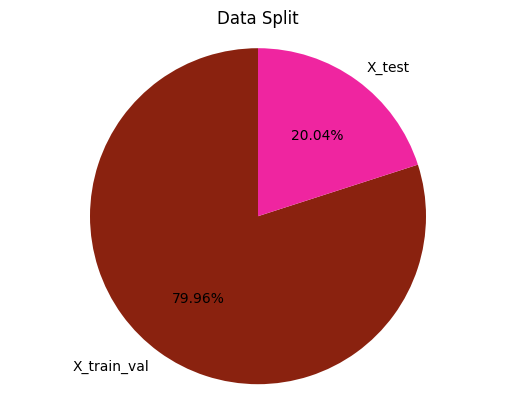

In [8]:
X_train, y_train, X_val, y_val, X_train_val, y_train_val, X_test, y_test = split(X, y, 0.2)
visualize_split([X_train,X_val,X_test ], ["X_train","X_val","X_test"])
visualize_split([X_train_val,X_test ], ["X_train_val","X_test"])

In [9]:
standard_scaler = StandardScaler()
standard_scaler.fit(X_train) # fit to the training data

X_train_scaled = standard_scaler.fit_transform(X_train)
X_val_scaled = standard_scaler.transform(X_val)
X_test_scaled = standard_scaler.transform(X_test)

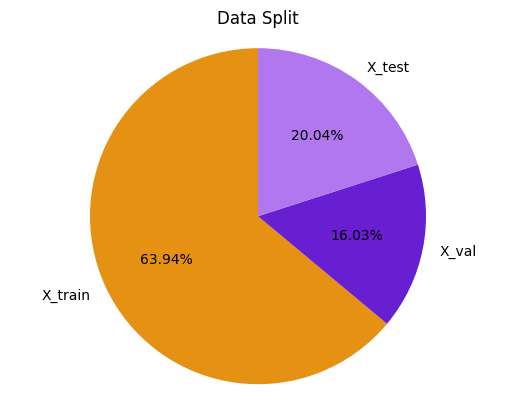

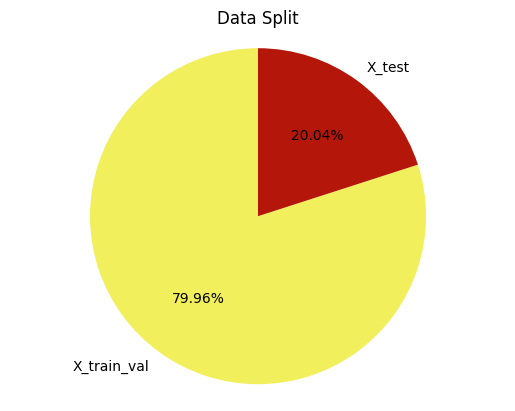

In [10]:
visualize_split([X_train, X_val, X_test],["X_train","X_val","X_test"])
visualize_split([X_train_val, X_test],["X_train_val","X_test"])

# Evaluation Results

In [11]:
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    acc = accuracy_score(y, y_pred)
    print(f"Test accuracy: {acc}")
    print(classification_report(y, y_pred, zero_division=0))

In [12]:
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

def linear_results(X_train, y_train, X_val, y_val, X_test, y_test, X_train_val, y_train_val, C):
    clf = svm.SVC(kernel = 'linear', gamma = 'auto', C = C)
    clf.fit(X_train, y_train)
    
    evaluate_model(clf, X_test, y_test)
    
def poly_results(X_train, y_train, X_val, y_val, X_test, y_test, X_train_val, y_train_val, degrees, C):
    best_acc = 0
    best_model = None
    best_deg = None
    
    for i in range(1, degrees):
        clf = svm.SVC(kernel = 'poly', gamma = 'auto', degree = i,  C = C)
        clf.fit(X_train, y_train)
        acc = clf.score(X_val, y_val)
        if acc > best_acc:
            best_acc = acc
            best_model = clf
            best_deg = i
        print("Degree:", i)
        evaluate_model(clf, X_test, y_test)
            
            
    print(f"Best degree: {best_deg}\n Best C: {C}\n Best overall validation accuracy: {best_acc}\n")
    evaluate_model(best_model, X_test, y_test)
    
def rbf_results(X_train, y_train, X_val, y_val, X_test, y_test, X_train_val, y_train_val, C):
    clf = svm.SVC(kernel = 'rbf', gamma = 'auto', C = C)
    clf.fit(X_train, y_train)
    acc = clf.score(X_val, y_val)

    evaluate_model(clf, X_test, y_test)

# Getting and Storing Results

In [19]:
poly_results(X_train, y_train, X_val, y_val, X_test, y_test, X_train_val, y_train_val, 20, 0.00001)

Degree: 1
Test accuracy: 0.8794117647058823
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       299
           1       0.00      0.00      0.00        41

    accuracy                           0.88       340
   macro avg       0.44      0.50      0.47       340
weighted avg       0.77      0.88      0.82       340

Degree: 2
Test accuracy: 0.8794117647058823
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       299
           1       0.00      0.00      0.00        41

    accuracy                           0.88       340
   macro avg       0.44      0.50      0.47       340
weighted avg       0.77      0.88      0.82       340

Degree: 3
Test accuracy: 0.8794117647058823
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       299
           1       0.00      0.00      0.00        41

    accuracy                           0.88       

In [14]:
# C = 0.00001
# Degree: 1
# Test accuracy: 0.8794117647058823
#               precision    recall  f1-score   support

#            0       0.88      1.00      0.94       299
#            1       0.00      0.00      0.00        41

#     accuracy                           0.88       340
#    macro avg       0.44      0.50      0.47       340
# weighted avg       0.77      0.88      0.82       340

# Degree: 2
# Test accuracy: 0.8794117647058823
#               precision    recall  f1-score   support

#            0       0.88      1.00      0.94       299
#            1       0.00      0.00      0.00        41

#     accuracy                           0.88       340
#    macro avg       0.44      0.50      0.47       340
# weighted avg       0.77      0.88      0.82       340

# Degree: 3
# Test accuracy: 0.8794117647058823
#               precision    recall  f1-score   support

#            0       0.88      1.00      0.94       299
#            1       0.00      0.00      0.00        41

#     accuracy                           0.88       340
#    macro avg       0.44      0.50      0.47       340
# weighted avg       0.77      0.88      0.82       340

# Degree: 4
# Test accuracy: 0.8794117647058823
#               precision    recall  f1-score   support

#            0       0.88      1.00      0.94       299
#            1       0.00      0.00      0.00        41

#     accuracy                           0.88       340
#    macro avg       0.44      0.50      0.47       340
# weighted avg       0.77      0.88      0.82       340

# Degree: 5
# Test accuracy: 0.8794117647058823
#               precision    recall  f1-score   support

#            0       0.88      1.00      0.94       299
#            1       0.00      0.00      0.00        41

#     accuracy                           0.88       340
#    macro avg       0.44      0.50      0.47       340
# weighted avg       0.77      0.88      0.82       340

# Degree: 6
# Test accuracy: 0.8794117647058823
#               precision    recall  f1-score   support

#            0       0.88      1.00      0.94       299
#            1       0.00      0.00      0.00        41

#     accuracy                           0.88       340
#    macro avg       0.44      0.50      0.47       340
# weighted avg       0.77      0.88      0.82       340

# Degree: 7
# Test accuracy: 0.8794117647058823
#               precision    recall  f1-score   support

#            0       0.88      1.00      0.94       299
#            1       0.00      0.00      0.00        41

#     accuracy                           0.88       340
#    macro avg       0.44      0.50      0.47       340
# weighted avg       0.77      0.88      0.82       340

# Degree: 8
# Test accuracy: 0.8794117647058823
#               precision    recall  f1-score   support

#            0       0.88      1.00      0.94       299
#            1       0.00      0.00      0.00        41

#     accuracy                           0.88       340
#    macro avg       0.44      0.50      0.47       340
# weighted avg       0.77      0.88      0.82       340

# Degree: 9
# Test accuracy: 0.8794117647058823
#               precision    recall  f1-score   support

#            0       0.88      1.00      0.94       299
#            1       0.00      0.00      0.00        41

#     accuracy                           0.88       340
#    macro avg       0.44      0.50      0.47       340
# weighted avg       0.77      0.88      0.82       340

# Best degree: 1
#  Best C: 1e-05
#  Best overall validation accuracy: 0.8566176470588235

# Test accuracy: 0.8794117647058823
#               precision    recall  f1-score   support

#            0       0.88      1.00      0.94       299
#            1       0.00      0.00      0.00        41

#     accuracy                           0.88       340
#    macro avg       0.44      0.50      0.47       340
# weighted avg       0.77      0.88      0.82       340

# # C = 1
# Degree: 1
# Test accuracy: 0.8794117647058823
#               precision    recall  f1-score   support

#            0       0.88      1.00      0.94       299
#            1       0.00      0.00      0.00        41

#     accuracy                           0.88       340
#    macro avg       0.44      0.50      0.47       340
# weighted avg       0.77      0.88      0.82       340

# Degree: 2
# Test accuracy: 0.8735294117647059
#               precision    recall  f1-score   support

#            0       0.88      0.99      0.93       299
#            1       0.00      0.00      0.00        41

#     accuracy                           0.87       340
#    macro avg       0.44      0.50      0.47       340
# weighted avg       0.77      0.87      0.82       340

# Degree: 3
# Test accuracy: 0.8764705882352941
#               precision    recall  f1-score   support

#            0       0.89      0.99      0.93       299
#            1       0.43      0.07      0.12        41

#     accuracy                           0.88       340
#    macro avg       0.66      0.53      0.53       340
# weighted avg       0.83      0.88      0.84       340

# Degree: 4
# Test accuracy: 0.8794117647058823
#               precision    recall  f1-score   support

#            0       0.89      0.99      0.94       299
#            1       0.50      0.10      0.16        41

#     accuracy                           0.88       340
#    macro avg       0.69      0.54      0.55       340
# weighted avg       0.84      0.88      0.84       340

# Degree: 5
# Test accuracy: 0.8794117647058823
#               precision    recall  f1-score   support

#            0       0.89      0.99      0.94       299
#            1       0.50      0.10      0.16        41

#     accuracy                           0.88       340
#    macro avg       0.69      0.54      0.55       340
# weighted avg       0.84      0.88      0.84       340

# Degree: 6
# Test accuracy: 0.8705882352941177
#               precision    recall  f1-score   support

#            0       0.89      0.98      0.93       299
#            1       0.36      0.10      0.15        41

#     accuracy                           0.87       340
#    macro avg       0.63      0.54      0.54       340
# weighted avg       0.82      0.87      0.84       340

# Degree: 7
# Test accuracy: 0.8735294117647059
#               precision    recall  f1-score   support

#            0       0.89      0.98      0.93       299
#            1       0.42      0.12      0.19        41

#     accuracy                           0.87       340
#    macro avg       0.65      0.55      0.56       340
# weighted avg       0.83      0.87      0.84       340

# Degree: 8
# Test accuracy: 0.8735294117647059
#               precision    recall  f1-score   support

#            0       0.89      0.98      0.93       299
#            1       0.42      0.12      0.19        41

#     accuracy                           0.87       340
#    macro avg       0.65      0.55      0.56       340
# weighted avg       0.83      0.87      0.84       340

# Degree: 9
# Test accuracy: 0.8764705882352941
#               precision    recall  f1-score   support

#            0       0.89      0.98      0.93       299
#            1       0.45      0.12      0.19        41

#     accuracy                           0.88       340
#    macro avg       0.67      0.55      0.56       340
# weighted avg       0.84      0.88      0.84       340

# Best degree: 1
#  Best C: 1
#  Best overall validation accuracy: 0.8566176470588235

# Test accuracy: 0.8794117647058823
#               precision    recall  f1-score   support

#            0       0.88      1.00      0.94       299
#            1       0.00      0.00      0.00        41

#     accuracy                           0.88       340
#    macro avg       0.44      0.50      0.47       340
# weighted avg       0.77      0.88      0.82       340

# # C = 10000

# Degree: 1
# Test accuracy: 0.8794117647058823
#               precision    recall  f1-score   support

#            0       0.88      1.00      0.94       299
#            1       0.00      0.00      0.00        41

#     accuracy                           0.88       340
#    macro avg       0.44      0.50      0.47       340
# weighted avg       0.77      0.88      0.82       340

# Degree: 2
# Test accuracy: 0.8647058823529412
#               precision    recall  f1-score   support

#            0       0.89      0.96      0.93       299
#            1       0.37      0.17      0.23        41

#     accuracy                           0.86       340
#    macro avg       0.63      0.57      0.58       340
# weighted avg       0.83      0.86      0.84       340

# Degree: 3
# Test accuracy: 0.788235294117647
#               precision    recall  f1-score   support

#            0       0.92      0.84      0.87       299
#            1       0.27      0.44      0.33        41

#     accuracy                           0.79       340
#    macro avg       0.59      0.64      0.60       340
# weighted avg       0.84      0.79      0.81       340

# Degree: 4
# Test accuracy: 0.8117647058823529
#               precision    recall  f1-score   support

#            0       0.92      0.86      0.89       299
#            1       0.31      0.44      0.36        41

#     accuracy                           0.81       340
#    macro avg       0.61      0.65      0.62       340
# weighted avg       0.84      0.81      0.83       340

# Degree: 5
# Test accuracy: 0.7941176470588235
#               precision    recall  f1-score   support

#            0       0.91      0.85      0.88       299
#            1       0.27      0.41      0.33        41

#     accuracy                           0.79       340
#    macro avg       0.59      0.63      0.60       340
# weighted avg       0.84      0.79      0.81       340

# Degree: 6
# Test accuracy: 0.8205882352941176
#               precision    recall  f1-score   support

#            0       0.91      0.88      0.90       299
#            1       0.31      0.39      0.34        41

#     accuracy                           0.82       340
#    macro avg       0.61      0.63      0.62       340
# weighted avg       0.84      0.82      0.83       340

# Degree: 7
# Test accuracy: 0.8
#               precision    recall  f1-score   support

#            0       0.92      0.85      0.88       299
#            1       0.29      0.46      0.36        41

#     accuracy                           0.80       340
#    macro avg       0.61      0.65      0.62       340
# weighted avg       0.84      0.80      0.82       340

# Degree: 8
# Test accuracy: 0.8411764705882353
#               precision    recall  f1-score   support

#            0       0.92      0.89      0.91       299
#            1       0.37      0.46      0.41        41

#     accuracy                           0.84       340
#    macro avg       0.65      0.68      0.66       340
# weighted avg       0.86      0.84      0.85       340

# Degree: 9
# Test accuracy: 0.8352941176470589
#               precision    recall  f1-score   support

#            0       0.92      0.89      0.90       299
#            1       0.35      0.44      0.39        41

#     accuracy                           0.84       340
#    macro avg       0.64      0.66      0.65       340
# weighted avg       0.85      0.84      0.84       340

# Best degree: 1
#  Best C: 10000
#  Best overall validation accuracy: 0.8566176470588235

# Test accuracy: 0.8794117647058823
#               precision    recall  f1-score   support

#            0       0.88      1.00      0.94       299
#            1       0.00      0.00      0.00        41

#     accuracy                           0.88       340
#    macro avg       0.44      0.50      0.47       340
# weighted avg       0.77      0.88      0.82       340

In [15]:
rbf_results(X_train, y_train, X_val, y_val, X_test, y_test, X_train_val, y_train_val, 1)

Test accuracy: 0.8823529411764706
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       299
           1       1.00      0.02      0.05        41

    accuracy                           0.88       340
   macro avg       0.94      0.51      0.49       340
weighted avg       0.90      0.88      0.83       340



In [16]:
linear_results(X_train, y_train, X_val, y_val, X_test, y_test, X_train_val, y_train_val, 0.00001)

Test accuracy: 0.8794117647058823
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       299
           1       0.00      0.00      0.00        41

    accuracy                           0.88       340
   macro avg       0.44      0.50      0.47       340
weighted avg       0.77      0.88      0.82       340



# 0.00001
Test accuracy: 0.8794117647058823
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       299
           1       0.00      0.00      0.00        41

    accuracy                           0.88       340
   macro avg       0.44      0.50      0.47       340
weighted avg       0.77      0.88      0.82       340

#1
Test accuracy: 0.8794117647058823
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       299
           1       0.00      0.00      0.00        41

    accuracy                           0.88       340
   macro avg       0.44      0.50      0.47       340
weighted avg       0.77      0.88      0.82       340

#2
Test accuracy: 0.8794117647058823
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       299
           1       0.00      0.00      0.00        41

    accuracy                           0.88       340
   macro avg       0.44      0.50      0.47       340
weighted avg       0.77      0.88      0.82       340

In [ ]:
# RBF Results

# C = 0.00001
# Test accuracy: 0.8794117647058823
#               precision    recall  f1-score   support

#            0       0.88      1.00      0.94       299
#            1       0.00      0.00      0.00        41

#     accuracy                           0.88       340
#    macro avg       0.44      0.50      0.47       340
# weighted avg       0.77      0.88      0.82       340

# C = 1
# Test accuracy: 0.8823529411764706
#               precision    recall  f1-score   support

#            0       0.88      1.00      0.94       299
#            1       1.00      0.02      0.05        41

#     accuracy                           0.88       340
#    macro avg       0.94      0.51      0.49       340
# weighted avg       0.90      0.88      0.83       340

# C = 10000
# Test accuracy: 0.8205882352941176
#               precision    recall  f1-score   support

#            0       0.91      0.89      0.90       299
#            1       0.29      0.34      0.31        41

#     accuracy                           0.82       340
#    macro avg       0.60      0.61      0.61       340
# weighted avg       0.83      0.82      0.83       340


In [ ]:
# Linear Results:

# C = 0.1
#               precision    recall  f1-score   support

#            0       1.00      1.00      1.00       299
#            1       1.00      1.00      1.00        41

#     accuracy                           1.00       340
#    macro avg       1.00      1.00      1.00       340
# weighted avg       1.00      1.00      1.00       340

# C = 1
# precision    recall  f1-score   support

#            0       1.00      1.00      1.00       299
#            1       1.00      1.00      1.00        41

#     accuracy                           1.00       340
#    macro avg       1.00      1.00      1.00       340
# weighted avg       1.00      1.00      1.00       340

# C = 2
#               precision    recall  f1-score   support

#            0       1.00      1.00      1.00       299
#            1       1.00      1.00      1.00        41

#     accuracy                           1.00       340
#    macro avg       1.00      1.00      1.00       340
# weighted avg       1.00      1.00      1.00       340

# C = 3
#               precision    recall  f1-score   support

#            0       1.00      1.00      1.00       299
#            1       1.00      1.00      1.00        41

#     accuracy                           1.00       340
#    macro avg       1.00      1.00      1.00       340
# weighted avg       1.00      1.00      1.00       340

In [ ]:
# C = 0.1
# Degree: 3
#               precision    recall  f1-score   support

#            0       0.89      1.00      0.94       299
#            1       1.00      0.10      0.18        41

#     accuracy                           0.89       340
#    macro avg       0.94      0.55      0.56       340
# weighted avg       0.90      0.89      0.85       340

# Degree: 4
#               precision    recall  f1-score   support

#            0       0.89      1.00      0.94       299
#            1       0.80      0.10      0.17        41

#     accuracy                           0.89       340
#    macro avg       0.84      0.55      0.56       340
# weighted avg       0.88      0.89      0.85       340

# Degree: 5
#               precision    recall  f1-score   support

#            0       0.89      0.99      0.94       299
#            1       0.67      0.10      0.17        41

#     accuracy                           0.89       340
#    macro avg       0.78      0.55      0.55       340
# weighted avg       0.86      0.89      0.85       340

# Degree: 6
#               precision    recall  f1-score   support

#            0       0.89      0.99      0.94       299
#            1       0.60      0.07      0.13        41

#     accuracy                           0.88       340
#    macro avg       0.74      0.53      0.53       340
# weighted avg       0.85      0.88      0.84       340

# Degree: 7
#               precision    recall  f1-score   support

#            0       0.89      0.99      0.94       299
#            1       0.50      0.07      0.13        41

#     accuracy                           0.88       340
#    macro avg       0.69      0.53      0.53       340
# weighted avg       0.84      0.88      0.84       340

# Degree: 8
#               precision    recall  f1-score   support

#            0       0.89      0.99      0.93       299
#            1       0.43      0.07      0.12        41

#     accuracy                           0.88       340
#    macro avg       0.66      0.53      0.53       340
# weighted avg       0.83      0.88      0.84       340

# Degree: 9
#               precision    recall  f1-score   support

#            0       0.89      0.98      0.93       299
#            1       0.38      0.07      0.12        41

#     accuracy                           0.87       340
#    macro avg       0.63      0.53      0.53       340
# weighted avg       0.82      0.87      0.83       340

# C = 1 
# Degree: 3
#               precision    recall  f1-score   support

#            0       0.93      0.99      0.96       299
#            1       0.90      0.44      0.59        41

#     accuracy                           0.93       340
#    macro avg       0.91      0.72      0.77       340
# weighted avg       0.92      0.93      0.92       340

# Degree: 4
#               precision    recall  f1-score   support

#            0       0.89      0.99      0.94       299
#            1       0.60      0.15      0.24        41

#     accuracy                           0.89       340
#    macro avg       0.75      0.57      0.59       340
# weighted avg       0.86      0.89      0.85       340

# Degree: 5
#               precision    recall  f1-score   support

#            0       0.90      0.99      0.94       299
#            1       0.64      0.17      0.27        41

#     accuracy                           0.89       340
#    macro avg       0.77      0.58      0.60       340
# weighted avg       0.87      0.89      0.86       340

# Degree: 6
#               precision    recall  f1-score   support

#            0       0.89      0.99      0.94       299
#            1       0.60      0.15      0.24        41

#     accuracy                           0.89       340
#    macro avg       0.75      0.57      0.59       340
# weighted avg       0.86      0.89      0.85       340

# Degree: 7
#               precision    recall  f1-score   support

#            0       0.89      0.98      0.94       299
#            1       0.55      0.15      0.23        41

#     accuracy                           0.88       340
#    macro avg       0.72      0.56      0.58       340
# weighted avg       0.85      0.88      0.85       340

# Degree: 8
#               precision    recall  f1-score   support

#            0       0.89      0.98      0.93       299
#            1       0.50      0.12      0.20        41

#     accuracy                           0.88       340
#    macro avg       0.70      0.55      0.57       340
# weighted avg       0.84      0.88      0.85       340

# Degree: 9
#               precision    recall  f1-score   support

#            0       0.89      0.98      0.93       299
#            1       0.50      0.12      0.20        41

#     accuracy                           0.88       340
#    macro avg       0.70      0.55      0.57       340
# weighted avg       0.84      0.88      0.85       340

# C = 2
# Degree: 3
#               precision    recall  f1-score   support

#            0       0.97      1.00      0.99       299
#            1       1.00      0.80      0.89        41

#     accuracy                           0.98       340
#    macro avg       0.99      0.90      0.94       340
# weighted avg       0.98      0.98      0.98       340

# Degree: 4
#               precision    recall  f1-score   support

#            0       0.90      0.99      0.94       299
#            1       0.71      0.24      0.36        41

#     accuracy                           0.90       340
#    macro avg       0.81      0.62      0.65       340
# weighted avg       0.88      0.90      0.87       340

# Degree: 5
#               precision    recall  f1-score   support

#            0       0.90      0.99      0.94       299
#            1       0.64      0.17      0.27        41

#     accuracy                           0.89       340
#    macro avg       0.77      0.58      0.60       340
# weighted avg       0.87      0.89      0.86       340

# Degree: 6
#               precision    recall  f1-score   support

#            0       0.90      0.98      0.94       299
#            1       0.58      0.17      0.26        41

#     accuracy                           0.89       340
#    macro avg       0.74      0.58      0.60       340
# weighted avg       0.86      0.89      0.86       340

# Degree: 7
#               precision    recall  f1-score   support

#            0       0.90      0.98      0.94       299
#            1       0.54      0.17      0.26        41

#     accuracy                           0.88       340
#    macro avg       0.72      0.58      0.60       340
# weighted avg       0.85      0.88      0.85       340

# Degree: 8
#               precision    recall  f1-score   support

#            0       0.90      0.98      0.94       299
#            1       0.54      0.17      0.26        41

#     accuracy                           0.88       340
#    macro avg       0.72      0.58      0.60       340
# weighted avg       0.85      0.88      0.85       340

# Degree: 9
#               precision    recall  f1-score   support

#            0       0.90      0.98      0.94       299
#            1       0.54      0.17      0.26        41

#     accuracy                           0.88       340
#    macro avg       0.72      0.58      0.60       340
# weighted avg       0.85      0.88      0.85       340

# C = 3
# Degree: 3
#               precision    recall  f1-score   support

#            0       0.99      1.00      0.99       299
#            1       0.97      0.90      0.94        41

#     accuracy                           0.99       340
#    macro avg       0.98      0.95      0.96       340
# weighted avg       0.99      0.99      0.99       340

# Degree: 4
#               precision    recall  f1-score   support

#            0       0.92      0.99      0.95       299
#            1       0.78      0.34      0.47        41

#     accuracy                           0.91       340
#    macro avg       0.85      0.66      0.71       340
# weighted avg       0.90      0.91      0.89       340

# Degree: 5
#               precision    recall  f1-score   support

#            0       0.91      0.98      0.94       299
#            1       0.69      0.27      0.39        41

#     accuracy                           0.90       340
#    macro avg       0.80      0.63      0.66       340
# weighted avg       0.88      0.90      0.88       340

# Degree: 6
#               precision    recall  f1-score   support

#            0       0.90      0.98      0.94       299
#            1       0.58      0.17      0.26        41

#     accuracy                           0.89       340
#    macro avg       0.74      0.58      0.60       340
# weighted avg       0.86      0.89      0.86       340

# Degree: 7
#               precision    recall  f1-score   support

#            0       0.90      0.98      0.94       299
#            1       0.54      0.17      0.26        41

#     accuracy                           0.88       340
#    macro avg       0.72      0.58      0.60       340
# weighted avg       0.85      0.88      0.85       340

# Degree: 8
#               precision    recall  f1-score   support

#            0       0.90      0.98      0.94       299
#            1       0.54      0.17      0.26        41

#     accuracy                           0.88       340
#    macro avg       0.72      0.58      0.60       340
# weighted avg       0.85      0.88      0.85       340

# Degree: 9
#               precision    recall  f1-score   support

#            0       0.90      0.98      0.93       299
#            1       0.50      0.17      0.25        41

#     accuracy                           0.88       340
#    macro avg       0.70      0.57      0.59       340
# weighted avg       0.85      0.88      0.85       340

# 11. Plotting

In [20]:
# Plot before removing features

# Plot for linear results:

def linear_plot():
    # C values
    x = [0.0001, 1, 10000]
    
    # Accuracy
    y = [0.88, 0.88, 0.88]
    
    plt.plot(x, y)
    plt.xlabel('C')
    plt.ylabel('Accuracy')
    plt.title('Linear Kernel Accuracy vs. C')
    plt.show

# Plot for poly results:

def poly_plot():
# Degrees
    x = [1, 2, 3, 4, 5, 6, 7, 8, 9]
# C = 0.1
    y = [0.88, 0.88, 0.88, 0.88, 0.88, 0.88, 0.88, 0.88, 0.88]
    y2 = [0.88, 0.87, 0.88, 0.88, 0.88, 0.87, 0.87, 0.87, 0.88]
    y3 = [0.88, 0.86, 0.79, 0.81, 0.79, 0.82, 0.80, 0.84, 0.84]
    plt.plot(x, y, marker='o',color='red', label = 'C = 0.00001', linewidth=2)
    plt.plot(x, y2, marker='o',color='orange', label = 'C = 1', linewidth=2)
    plt.plot(x, y3, marker='o',color='yellow' , label = 'C = 10000', linewidth=2)
    plt.legend(loc='lower left')
    plt.xlabel('Degree')
    plt.ylabel('Test Accuracy')
    plt.title('Poly Kernel Test Accuracy vs. Degree')
    plt.show

# Plot for rbf results
def rbf_plot():
    x = [0.00001, 1, 10000]
    y = [0.879, 0.882, 0.821]
    plt.plot(x, y)
    plt.xlabel('C')
    plt.ylabel('Accuracy')
    plt.title('RBF Kernel Accuracy vs. C')
    plt.show

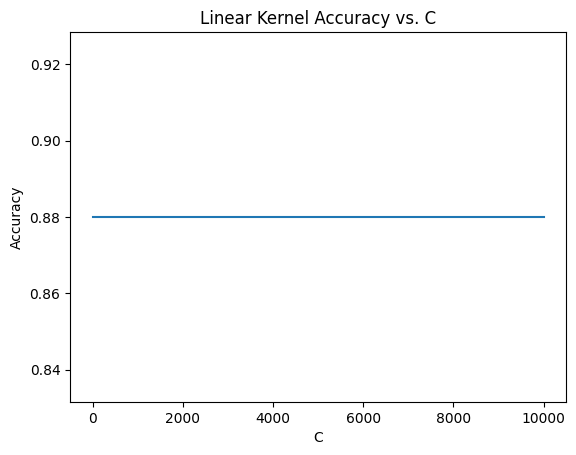

In [21]:
linear_plot()

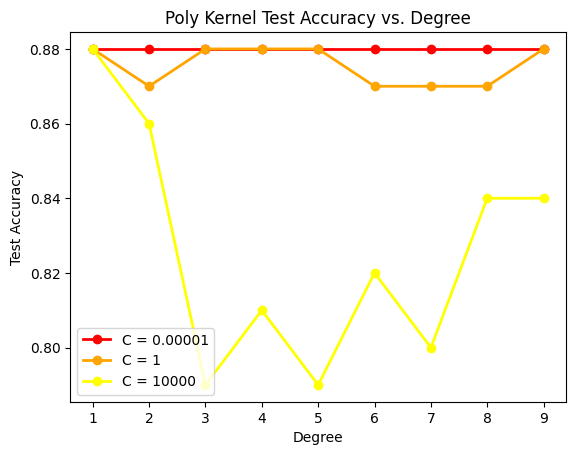

In [22]:
poly_plot()

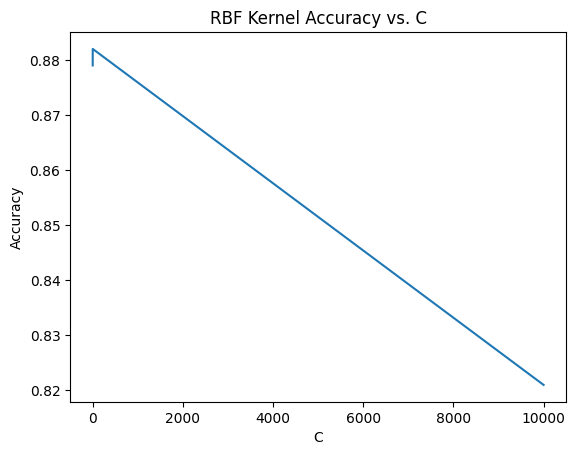

In [23]:
rbf_plot()